# Multiple Linear Regression for 50 Startups


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('50_Startups.csv')

In [7]:
df.rename(columns={"R&D Spend": "RandDSpend"}, inplace = True)

In [8]:
df.rename(columns={"Marketing Spend": "MarketingSpend"}, inplace= True)

In [4]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [9]:
df.describe()

,RandDSpend,Administration,MarketingSpend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


{'whiskers': [<matplotlib.lines.Line2D at 0x21c627bbd30>,
 'caps': [<matplotlib.lines.Line2D at 0x21c627d1430>,
 'boxes': [<matplotlib.lines.Line2D at 0x21c627bb9d0>],
 'medians': [<matplotlib.lines.Line2D at 0x21c627d1af0>],
 'fliers': [<matplotlib.lines.Line2D at 0x21c627d1df0>],
 'means': []}

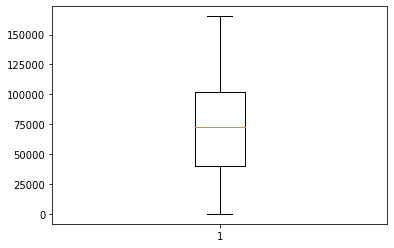

In [10]:
plt.boxplot(df['RandDSpend'])

{'whiskers': [<matplotlib.lines.Line2D at 0x21c62862cd0>,
 'caps': [<matplotlib.lines.Line2D at 0x21c6286f3d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x21c62862970>],
 'medians': [<matplotlib.lines.Line2D at 0x21c6286fa90>],
 'fliers': [<matplotlib.lines.Line2D at 0x21c6286fd90>],
 'means': []}

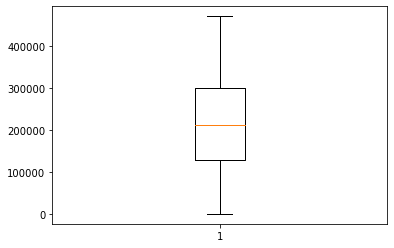

In [11]:
plt.boxplot(df['MarketingSpend'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RandDSpend      50 non-null     float64
 1   Administration  50 non-null     float64
 2   MarketingSpend  50 non-null     float64
 3   State           50 non-null     object 
 4   Profit          50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [13]:
df.head()

,RandDSpend,Administration,MarketingSpend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [9]:
#df.drop(['State'], axis = 1, inplace= True)

In [14]:
df.corr()

,RandDSpend,Administration,MarketingSpend,Profit
RandDSpend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
MarketingSpend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


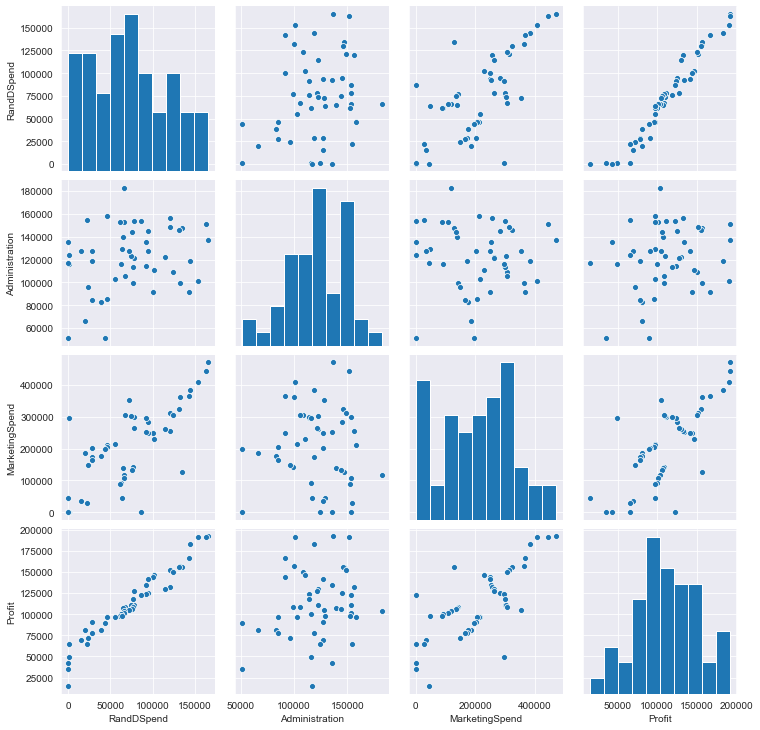

In [15]:
## Scatterplot between variables along with histogram
sns.set_style('darkgrid')
sns.pairplot(df)

# Building Model1

In [27]:
## Preparing model
import statsmodels.formula.api as smf
model1 = smf.ols('Profit~RandDSpend+Administration+MarketingSpend', data = df).fit()

In [20]:
model1.params

Intercept            50125.343832
State[T.Florida]       198.788793
State[T.New York]      -41.887019
RandDSpend               0.806023
Administration          -0.027004
MarketingSpend           0.026980
dtype: float64

In [28]:
print(model1.tvalues.round(3), '/n', model1.pvalues.round(3))

Intercept          7.626
RandDSpend        17.846
Administration    -0.526
MarketingSpend     1.655
dtype: float64 /n Intercept         0.000
RandDSpend        0.000
Administration    0.602
MarketingSpend    0.105
dtype: float64


In [29]:
print(model1.rsquared.round(3), '\n', model1.rsquared_adj.round(3))


0.951 
 0.948


In [30]:
m1_R_Val = model1.rsquared.round(3)
m1_R_Val

0.951

# Simple Linear Regression Model

In [33]:
ml_ad = smf.ols('Profit~Administration', data = df).fit()
print(ml_ad.tvalues.round(3), '\n' , ml_ad.pvalues.round(3))

Intercept         3.040
Administration    1.419
dtype: float64 
 Intercept         0.004
Administration    0.162
dtype: float64


In [31]:
ml_mk = smf.ols('Profit~MarketingSpend', data= df).fit()
print(ml_mk.tvalues.round(3), '\n' , ml_mk.pvalues.round(3))

Intercept         7.808
MarketingSpend    7.803
dtype: float64 
 Intercept         0.0
MarketingSpend    0.0
dtype: float64


# Building Model 2 with RandD and Administration

In [104]:
model2 = smf.ols('Profit~RandDSpend+Administration', data= df).fit()

In [105]:
model2.tvalues.round(3), '\n' , model2.pvalues.round(3)

(Intercept          9.122
 RandDSpend        28.589
 Administration    -1.073
 dtype: float64,
 '\n',
 Intercept         0.000
 RandDSpend        0.000
 Administration    0.289
 dtype: float64)

In [106]:
model2.rsquared, '/n' , model2.rsquared_adj

(0.9478129385009173, '/n', 0.9455922124796797)

In [107]:
m2_R_Val = model2.rsquared.round(3)
m2_R_Val

0.948

# Building Model 3 with RandD and MarketingSpend

In [109]:
model3 = smf.ols('Profit~RandDSpend + MarketingSpend', data= df).fit()

In [110]:
model3.rsquared

0.9504503015559763

In [112]:
m3_R_Val = model3.rsquared.round(3)
m3_R_Val

0.95

# Calculating VIF

In [59]:
### Calculating VIF
rsq_RandD = smf.ols('RandDSpend~Administration + MarketingSpend', data= df).fit().rsquared
vif_RandD = 1/(1-rsq_RandD)

rsq_Ad = smf.ols('Administration~ RandDSpend + MarketingSpend', data= df).fit().rsquared
vif_Ad = 1/(1-rsq_Ad)

rsq_Mar = smf.ols('MarketingSpend~ RandDSpend + Administration', data=df).fit().rsquared
vif_Mar = 1/(1-rsq_Mar)



In [63]:
d1 = {'Variable': ['RandD', 'Ad', 'Mar'], 'VIF': [vif_RandD, vif_Ad, vif_Mar]}
VIF_Values = pd.DataFrame(d1)
VIF_Values


,Variable,VIF
0,RandD,2.468903
1,Ad,1.175091
2,Mar,2.326773


# Test for normality of Residuals - QQ Plot

In [34]:
import statsmodels.api as sm

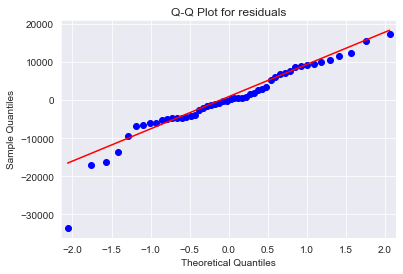

In [46]:
qqplot = sm.qqplot(model.resid, line = 'q')
plt.title("Q-Q Plot for residuals")
plt.show()

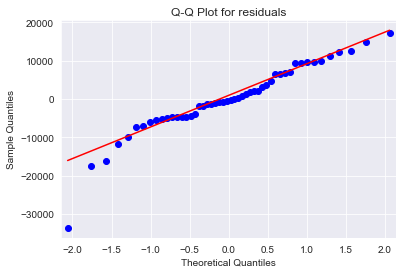

In [48]:
qqplot = sm.qqplot(model2.resid, line = 'q')
plt.title("Q-Q Plot for residuals")
plt.show()

# Residual Plot for Homoscedasticity

In [85]:
def get_standardized_values(vals):
    return (vals - vals.mean())/vals.std()

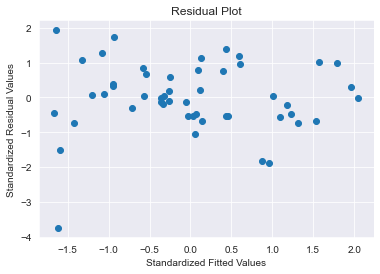

In [86]:
plt.scatter(get_standardized_values(model.fittedvalues),get_standardized_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residual Values')
plt.show()

# Residuals Vs Regressor Plots

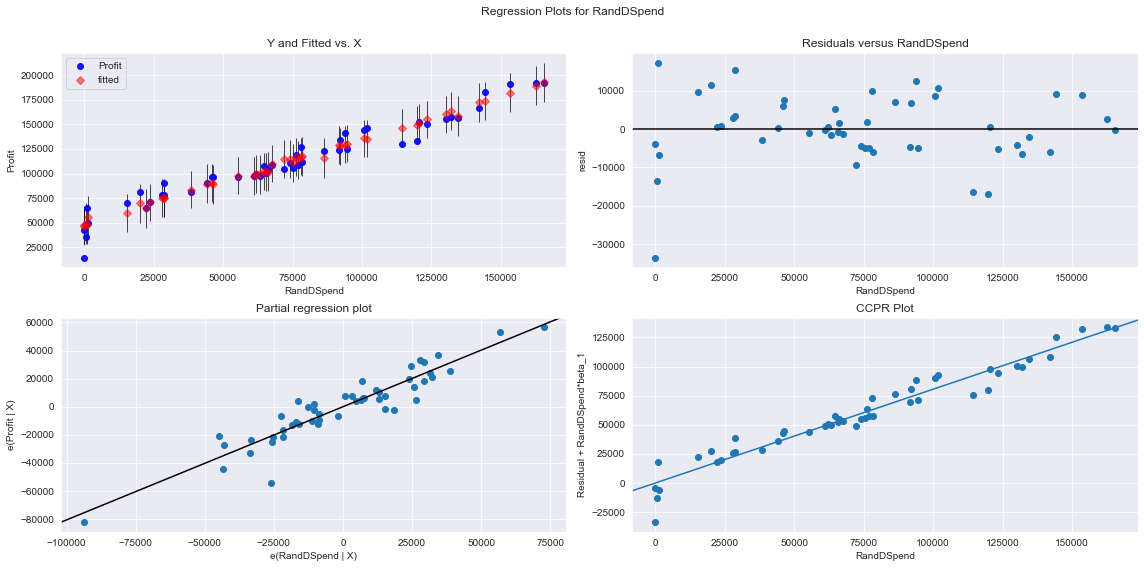

In [74]:
### Residuals Vs Regressors for RandSpend Variable
fig = plt.figure(figsize = (16,8))
fig = sm.graphics.plot_regress_exog(model, "RandDSpend", fig = fig)
plt.show()

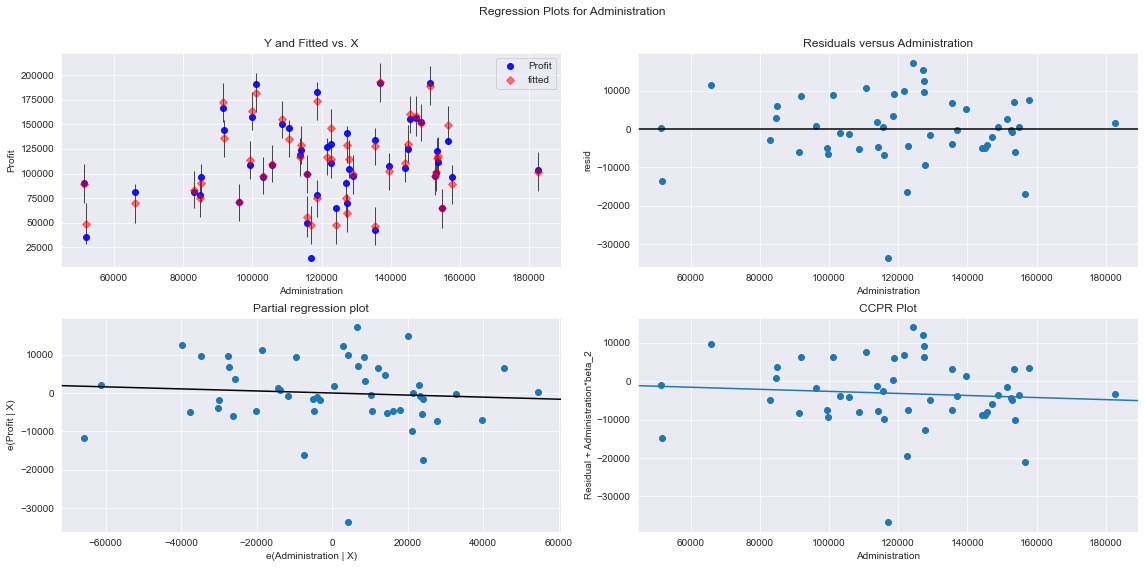

In [75]:
### Residuals Vs Regressors for Administration Variable
fig = plt.figure(figsize = (16,8))
fig = sm.graphics.plot_regress_exog(model, "Administration", fig = fig)
plt.show()

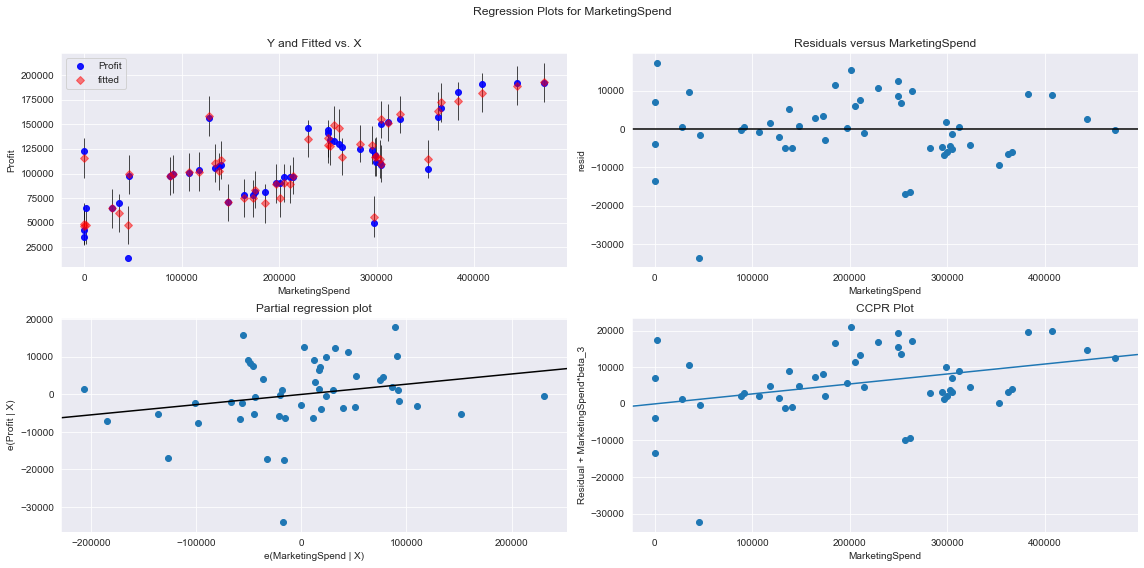

In [77]:
### Residuals Vs Regressors for Marketing spend Variable
fig = plt.figure(figsize=(16,8))
fig = sm.graphics.plot_regress_exog(model, "MarketingSpend", fig = fig)
plt.show()

# Model Deletion Diagnostics
# Detecting Outliers/Influencers

# Cooks Distance

In [80]:
model_influence = model.get_influence()
(c,_) = model_influence.cooks_distance
(c,_)

(array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
        1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
        4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
        1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
        8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
        4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
        5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
        1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
        7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
        5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
        1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
        1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
        1.90527441e-01, 2.88082293e-01]),
 array([1.        , 0.99997771, 0.99791128, 0.99904583, 0.9995713 ,
        0.99971836, 0.9999

<ipython-input-84-f53c7eefa15f>:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(df)), np.round(c,3))


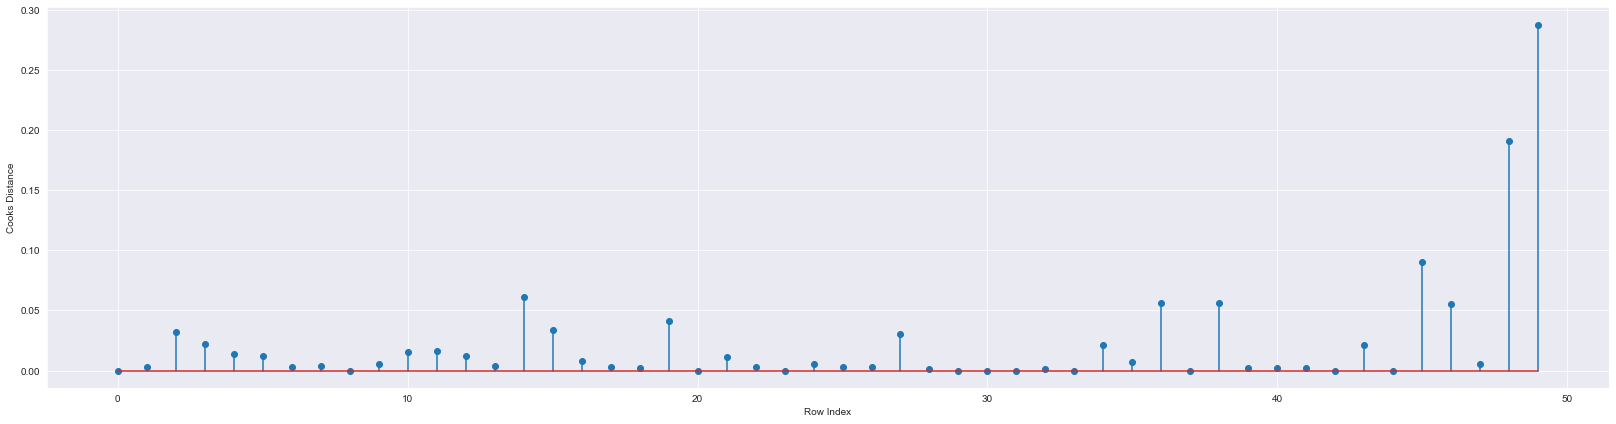

In [84]:
## Influencers values plot(Stem Plot)
fig = plt.subplots(figsize = (28, 7))
plt.stem(np.arange(len(df)), np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [87]:
np.argmax(c), np.max(c)

(49, 0.2880822927543267)

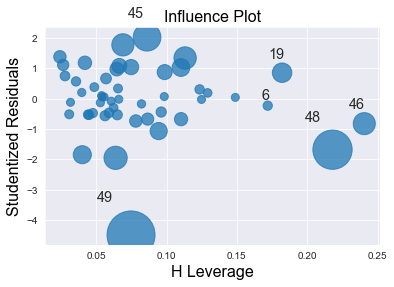

In [89]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [91]:
a = df.shape[1]
b = df.shape[0]
leverage_Cutoff = 3*((a+1)/b)
leverage_Cutoff

0.30000000000000004

In [92]:
### As the cooks distance is less than 1, will finalise the model.

# Table for Rsquared Values for 2 models.


In [113]:
d2 = {'Models': ['Model1', 'Model2','Model3'],'RsquaredValues': [m1_R_Val, m2_R_Val, m3_R_Val]}
Rsquared_df = pd.DataFrame(d2)
Rsquared_df

,Models,RsquaredValues
0,Model1,0.951
1,Model2,0.948
2,Model3,0.950


In [121]:
pred_y = model1.predict(df).round(3)

In [124]:
pred_y.head()

0    192521.253
1    189156.768
2    182147.279
3    173696.700
4    172139.514
dtype: float64

In [125]:
df.head()

,RandDSpend,Administration,MarketingSpend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
